# IMPORTATION DES PACKAGES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTATION DES DONNEES

In [7]:

marketing_df = pd.read_csv('marketing.csv')

In [8]:
#decription du dataFrame
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [22]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [9]:
#Resume statistiques
marketing_df.describe().T

,count,unique,top,freq
user_id,10037,7309,a100000882,12
date_served,10021,31,1/15/18,789
marketing_channel,10022,5,House Ads,4733
variant,10037,2,control,5091
converted,10022,2,False,8946
language_displayed,10037,4,English,9793
language_preferred,10037,4,English,9275
age_group,10037,7,19-24 years,1682
date_subscribed,1856,31,1/16/18,163
date_canceled,577,115,4/2/18,15


In [10]:
#Canaux Marketing utilises par l'entreprise
marketing_df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [6]:
#En terme de proportion
marketing_df['marketing_channel'].value_counts(normalize=True)

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

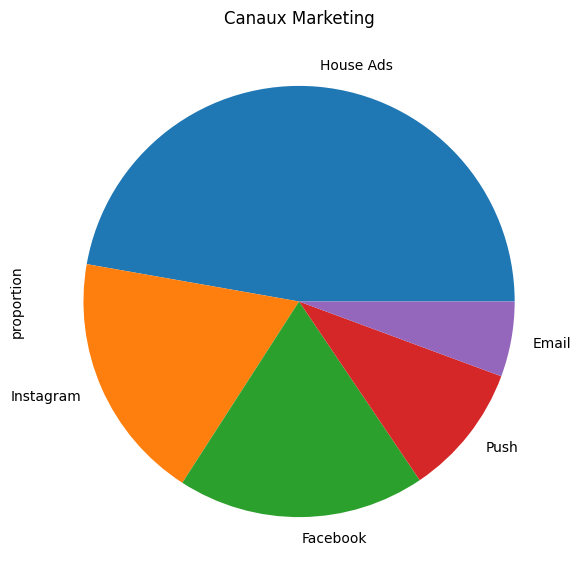

In [11]:
#Representation des canaux digitaux
plt.figure(figsize=(7,7))
marketing_df['marketing_channel'].value_counts(normalize=True).plot(kind='pie')
plt.title("Canaux Marketing")
plt.show()

# VARIABLES DATE AU FORMAT DATETIME

In [12]:
#Changement du type de certaines colonnes
for col in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[col] = pd.to_datetime(marketing_df[col])

#Verification
marketing_df.dtypes    

C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_12228\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_12228\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])
C:\Users\Dell Pro X360\AppData\Local\Temp\ipykernel_12228\3427183966.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_df[col] = pd.to_datetime(marketing_df[col])


user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [13]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


# LE NOMBRE D'UTILISATEURS RETENUS PAR LA CAMPAGNE



In [14]:
#Nombre d'utilisateur retenu est:
marketing_df['is_retained'].sum()

1279

In [15]:
#En terme de proportion nous avons
marketing_df['is_retained'].value_counts(normalize=True)

is_retained
True     0.689116
False    0.310884
Name: proportion, dtype: float64

# CREATION DES NOUVELLES COLONNES

In [16]:
#Dictionnaire des chaines dinstinctes de souscription avec leurs codes
dict_channel = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Push':4, 'Email':5}

In [17]:
#Creation de la nouvelle colonne 'channel_code'
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channel)

In [18]:
#Ajout d'une nouvelle colonne 'is_correct_lang'
marketing_df['is_correct_lang'] = np.where (marketing_df['language_displayed'] == marketing_df['language_preferred'], 'Yes', 'No')

In [20]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
channel_code                  float64
is_correct_lang                object
dtype: object

In [21]:
#Ajout de la colonne 'DoW' qui represente le jour de la semaine
marketing_df['Dow'] =  marketing_df['date_subscribed'].dt.dayofweek

In [22]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,Dow
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0


In [28]:
marketing_df.describe()

,date_served,date_subscribed,date_canceled,channel_code,Dow
count,10021,1856,577,1856.000000,1856.000000
mean,2018-01-15 05:02:03.221235712,2018-01-14 02:04:08.275862016,2018-03-03 18:28:04.575389952,2.697737,2.529634
min,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-05 00:00:00,1.000000,0.000000
25%,2018-01-08 00:00:00,2018-01-07 00:00:00,2018-02-07 00:00:00,2.000000,1.000000
50%,2018-01-15 00:00:00,2018-01-15 00:00:00,2018-03-04 00:00:00,2.000000,2.000000
75%,2018-01-22 00:00:00,2018-01-19 00:00:00,2018-04-01 00:00:00,3.000000,4.000000
max,2018-01-31 00:00:00,2018-01-31 00:00:00,2018-05-09 00:00:00,5.000000,6.000000
std,NaN,NaN,NaN,1.307954,1.937900


### UTILISATEURS UNIQUES QUI VOIENT LES ANNONCES MARKETING CHAQUE JOUR

In [29]:
#Grouper les observations par la variable 'date_served' et compter le nombre d'utilisateurs(variable user_id)
daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

### VISUALISATION DE RESULTATS

Text(0.5, 1.0, "Nombre journalier d'utilisateurs regardant les annonces marketing\n")

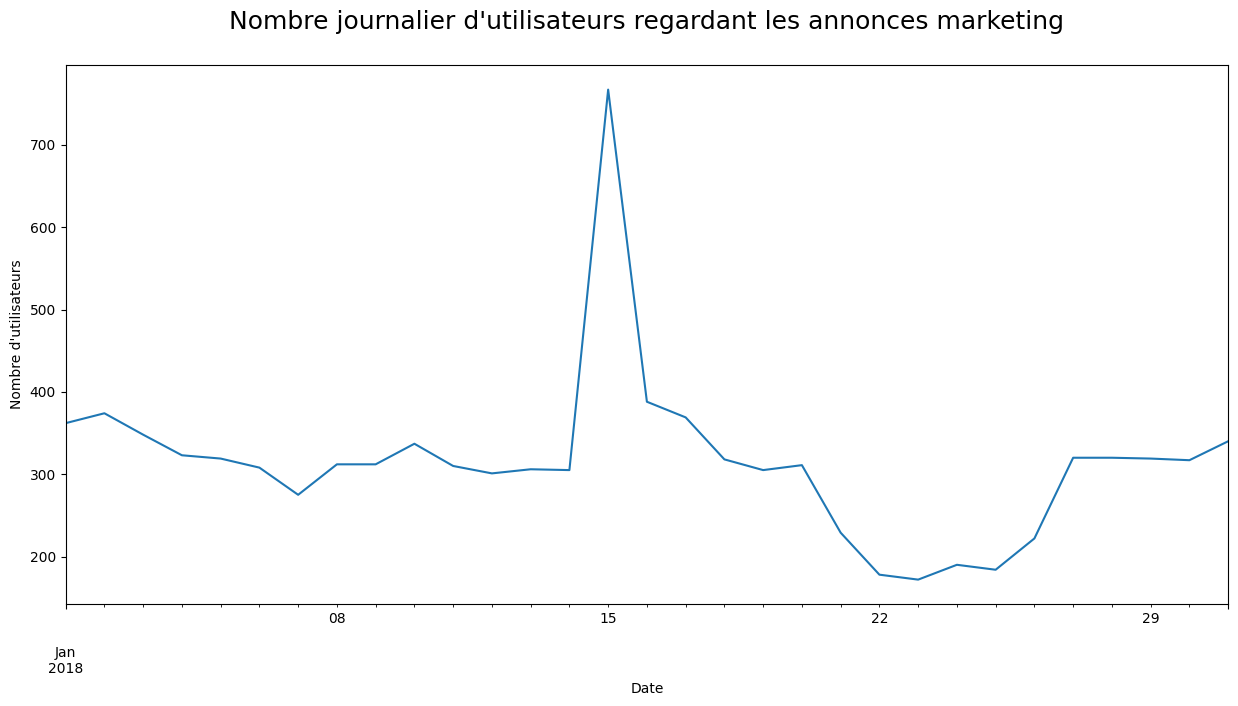

In [30]:
#visualisation
plt.figure(figsize=(15, 7))
daily_users.plot.line()
plt.xlabel('Date')
plt.ylabel("Nombre d'utilisateurs")
plt.title("Nombre journalier d'utilisateurs regardant les annonces marketing\n", fontsize=18)

# INDICATEURS CLES DE PERFORMANCES

### Calculons le taux conversion total

In [32]:
# Calcul du taux de conversion total
   # Nombres d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombre d'utilisateurs uniques est:", n_unique_users)

   # Nombre utilisateur unique ayant souscrit au service
n_souscripteurs = marketing_df[marketing_df['converted']==True]['user_id'].nunique()
print('\n')
print("Le nombbre d'utilisateurs uniques ayant souscrit au service est", n_souscripteurs)

   # Le taux de conversion global
taux_conv_global = n_souscripteurs/n_unique_users
print('\n')
print("Le taux de convertion globale est egale", round(taux_conv_global*100, 2), '%')



Le nombre d'utilisateurs uniques est: 7309


Le nombbre d'utilisateurs uniques ayant souscrit au service est 1015


Le taux de convertion globale est egale 13.89 %


### Calculons le taux de retention

In [33]:
# Calcul du taux de retention global d'un mois
   #nombres de personnes qui sont restees abonnees
retained = marketing_df[marketing_df['is_retained']==True]['user_id'].nunique()

  # Taux de retention
taux_retention_global = retained/n_souscripteurs
print("Le taux de retention global est de ", round(taux_retention_global*100, 2), '%')

Le taux de retention global est de  66.8 %


# SEGMENTATION DE CLIENTELLE

### Taux de retention par canal de souscription

In [36]:
# Nombre total d'utilisateurs retenu par canal de marketing
n_retained_per_canal = marketing_df[marketing_df['is_retained']==True].groupby('subscribing_channel')['user_id'].nunique()
print( n_retained_per_canal)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [37]:
# Nombre total d'utilisateur ayant souscrit a l'abonnement via chaque canal
n_converted_per_canal = marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()
print(n_converted_per_canal) 

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


### Nous pouvons maintenant calculer le taux de retention pour chaque canal de souscription 

In [40]:
#Taux de retention par canal de souscription
taux_retention_per_canal = (n_retained_per_canal/n_converted_per_canal) * 100
taux_retention_per_canal.sort_values(ascending=False)

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

### Visualisation des resultats

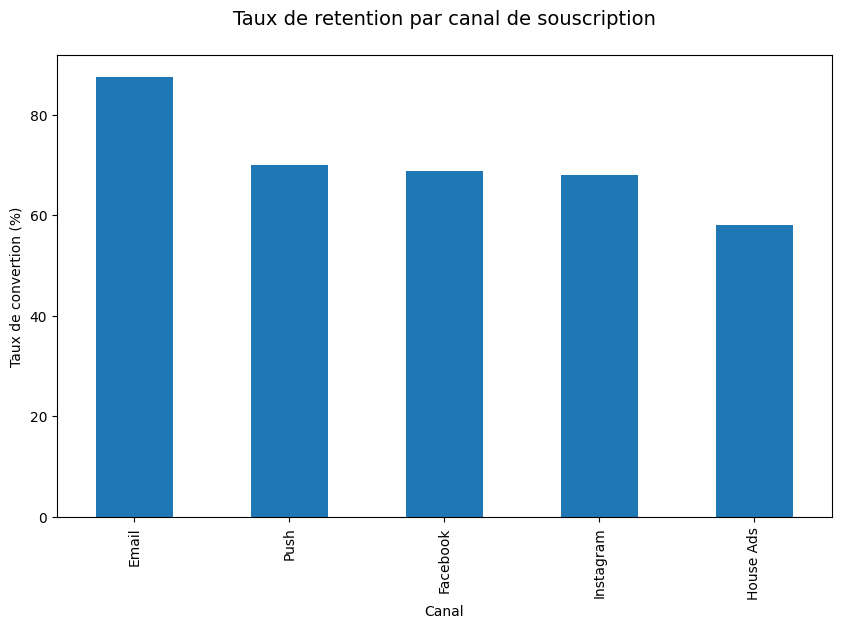

In [41]:
# Visualisation
plt.figure(figsize=(10, 6))
taux_retention_per_canal.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par canal de souscription\n", fontsize=14)

plt.xlabel('Canal')

plt.ylabel('Taux de convertion (%)')

plt.show()


# AUTOMATISATION DU CALCUL DE TAUX DE RETENTION

### Creation de la fonction

In [42]:
# Fonction de calcul du taux de retention 
def retention_rate(dataframe, column_names):
    retained = dataframe[dataframe['is_retained']==True].groupby(column_names)['user_id'].nunique()
    converted = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate
# Appel de la fonction retention_rate
retention_rate(marketing_df, ['subscribing_channel'])


    

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [44]:
# Taux de retentio par langue affichee
taux_retention_par_langue = retention_rate(marketing_df, ['language_displayed'])

taux_retention_par_langue

language_displayed
Arabic     0.750000
English    0.668467
German     0.773585
Spanish    1.000000
Name: user_id, dtype: float64

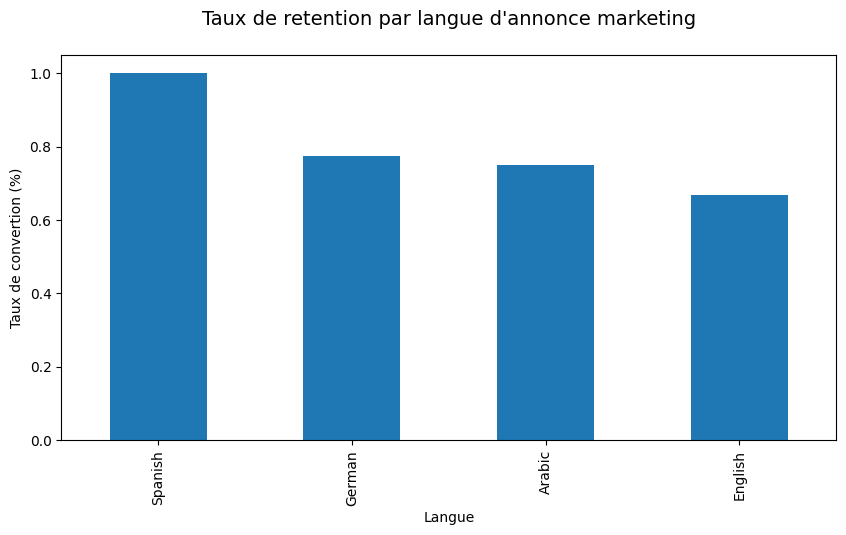

In [45]:
# Visualisation des resultats
plt.figure(figsize=(10, 5))

taux_retention_par_langue.sort_values(ascending=False).plot(kind='bar')

plt.title("Taux de retention par langue d'annonce marketing\n", fontsize=14)

plt.xlabel('Langue')

plt.ylabel('Taux de convertion (%)')

plt.show()

# TAUX DE CONVERTION PAR CANAL D'AQUISITION

In [46]:
# Nombre d'utilisateurs uniques ayant souscrit au service
n_souscripteurs_par_canal = marketing_df[marketing_df['converted']==True].groupby('subscribing_channel')['user_id'].nunique()

#Nombre total de personnes atteintes par la campagne pour chaque canal
total_per_canal = marketing_df.groupby('subscribing_channel')['user_id'].nunique()

taux_conv_par_canal = (n_souscripteurs_par_canal/total_per_canal) * 100

taux_conv_par_canal.sort_values(ascending=False)


subscribing_channel
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Email         83.854167
Name: user_id, dtype: float64